In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split 

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, f_classif

from sklearn.model_selection import validation_curve
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import learning_curve
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

In [ ]:
data = pd.read_csv('messidor_features.csv')
data.head()

,id,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,Class
0,1,1,1,22,22,22,19,18,14,49.895756,17.775994,5.270920,0.771761,0.018632,0.006864,0.003923,0.003923,0.486903,0.100025,1,0
1,2,1,1,24,24,22,18,16,13,57.709936,23.799994,3.325423,0.234185,0.003903,0.003903,0.003903,0.003903,0.520908,0.144414,0,0
2,3,1,1,62,60,59,54,47,33,55.831441,27.993933,12.687485,4.852282,1.393889,0.373252,0.041817,0.007744,0.530904,0.128548,0,1
3,4,1,1,55,53,53,50,43,31,40.467228,18.445954,9.118901,3.079428,0.840261,0.272434,0.007653,0.001531,0.483284,0.114790,0,0
4,5,1,1,44,44,44,41,39,27,18.026254,8.570709,0.410381,0.000000,0.000000,0.000000,0.000000,0.000000,0.475935,0.123572,0,1


we check for nan values in the dataset using seaborn's heatmap

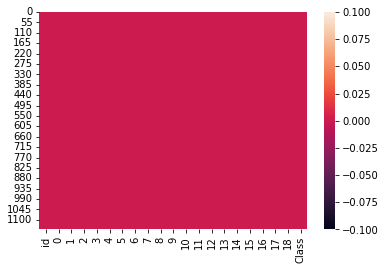

In [ ]:
sns.heatmap(data.isna())

we conclude from the heatmap that there is no nan (not a number) values in our dataset

so we will drop the id column because it is non usable in our study

In [ ]:
data = data.drop(['id'], axis=1)
data.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,Class
count,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000
mean,0.996525,0.918332,38.428323,36.909644,35.140747,32.297133,28.747176,21.151173,64.096674,23.088012,8.704610,1.836489,0.560738,0.212290,0.085674,0.037225,0.523212,0.108431,0.336229,0.530843
std,0.058874,0.273977,25.620913,24.105612,22.805400,21.114767,19.509227,15.101560,58.485289,21.602696,11.567589,3.923224,2.484111,1.057126,0.398717,0.178959,0.028055,0.017945,0.472624,0.499265
min,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.349274,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.367762,0.057906,0.000000,0.000000
25%,1.000000,1.000000,16.000000,16.000000,15.000000,14.000000,11.000000,8.000000,22.271597,7.939315,1.249050,0.081554,0.000000,0.000000,0.000000,0.000000,0.502855,0.095799,0.000000,0.000000
50%,1.000000,1.000000,35.000000,35.000000,32.000000,29.000000,25.000000,18.000000,44.249119,17.038020,4.423472,0.484829,0.022248,0.001554,0.000000,0.000000,0.523308,0.106623,0.000000,1.000000
75%,1.000000,1.000000,55.000000,53.000000,51.000000,48.000000,43.000000,32.000000,87.804112,31.305692,11.766880,1.921648,0.191953,0.038450,0.004832,0.003851,0.543670,0.119591,1.000000,1.000000
max,1.000000,1.000000,151.000000,132.000000,120.000000,105.000000,97.000000,89.000000,403.939108,167.131427,106.070092,59.766121,51.423208,20.098605,5.937799,3.086753,0.592217,0.219199,1.000000,1.000000


in this part we confirm the abscence of missing data

In [ ]:
data.describe().iloc[0, :].unique()

array([1151.])

plus we check if the data is evenly distributed in classes

In [ ]:
data['Class'].value_counts(normalize=True)

1    0.530843
0    0.469157
Name: Class, dtype: float64

we deduct that the classes are balanced, next we will check all the data type that compose this dataset

In [ ]:
data.dtypes.value_counts()

int64      10
float64    10
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

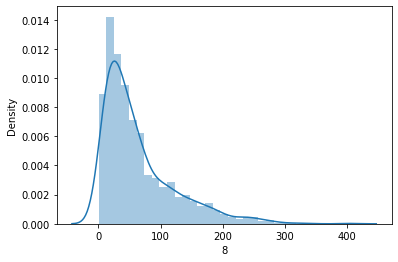

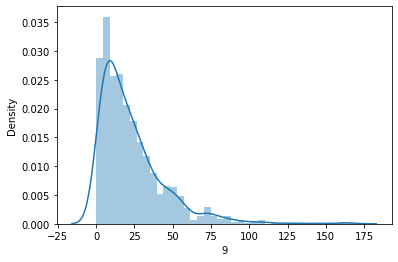

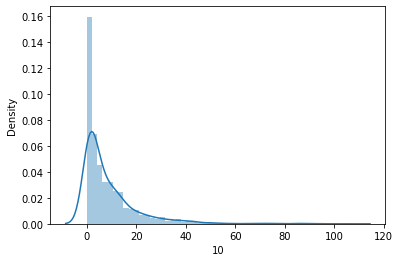

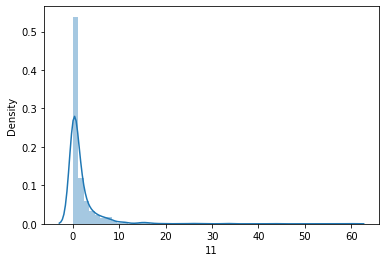

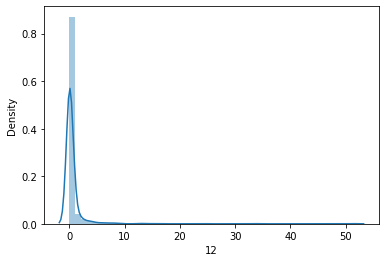

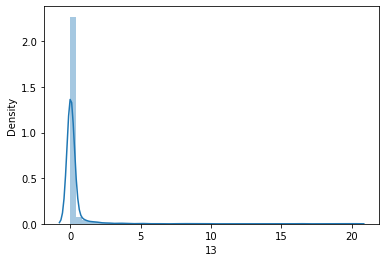

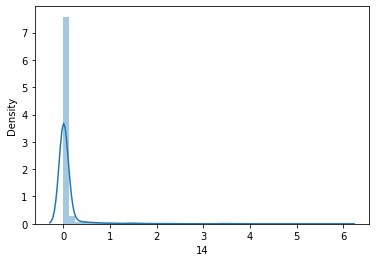

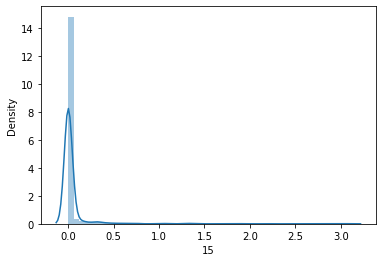

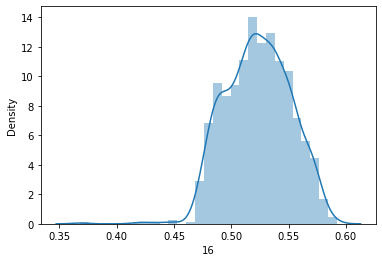

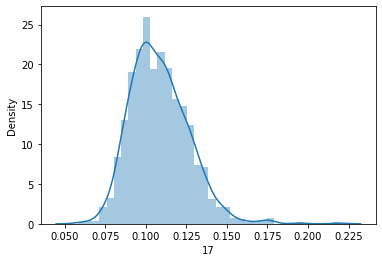

In [ ]:
for col in data.select_dtypes('float64'):
  plt.figure()
  sns.distplot(data[col])

we notice that the distrubution is asymetrique for most of the features with dtype = float

In [ ]:
positif = data[data['Class'] == 1]

In [ ]:
negative = data[data['Class'] == 0]

In [ ]:
ma_columns = data.columns[2:8]

In [ ]:
ex_columns = data.columns[8:17]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

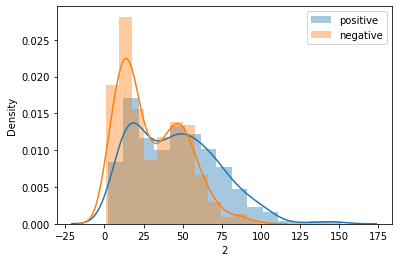

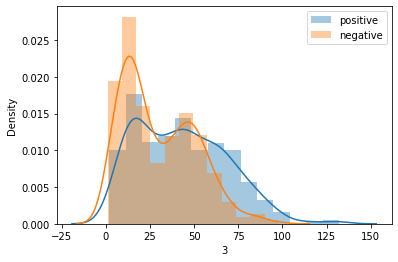

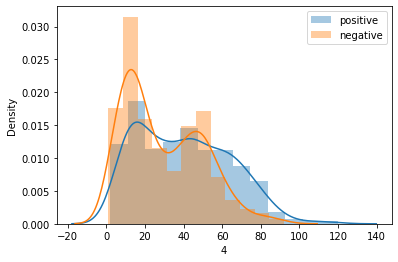

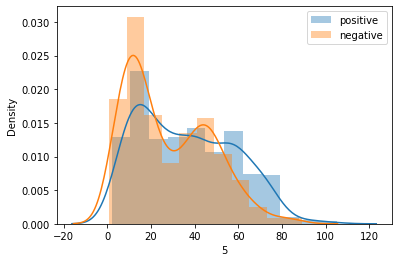

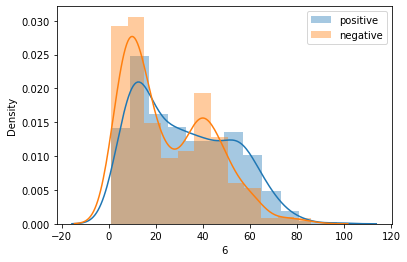

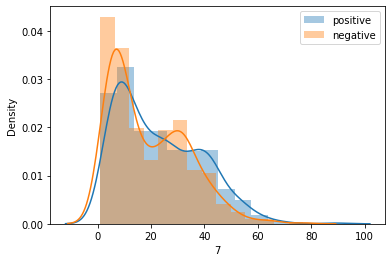

In [ ]:
for col in data[ma_columns]:
  plt.figure()
  sns.distplot(positif[col], label='positive')
  sns.distplot(negative[col], label='negative')
  plt.legend()

we notice that the distrubution is asymetrique for most of the MA-detection features plus we notice a diffrence in value's in positive and negative cases which tell us that these attributes have a role in the classification for a postive or a negative Diabetic retina case

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

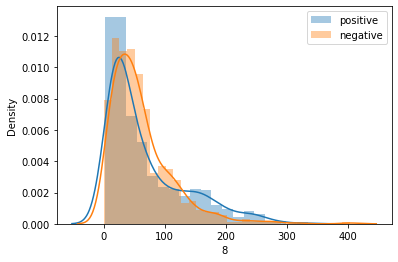

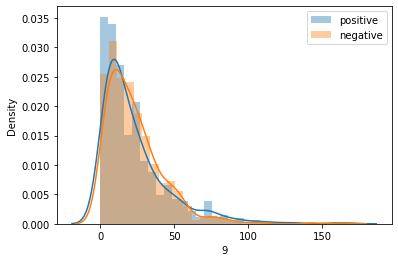

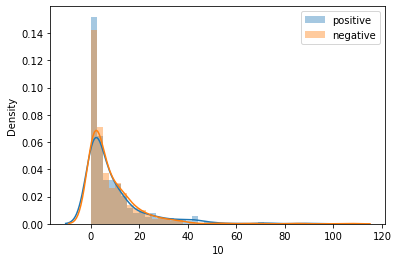

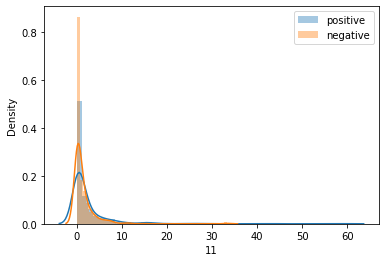

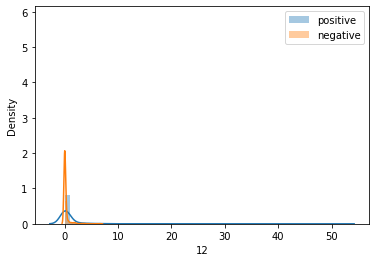

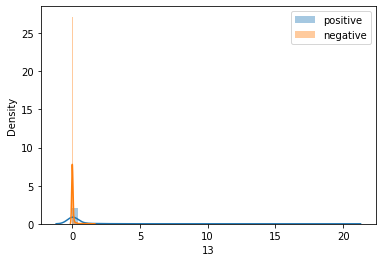

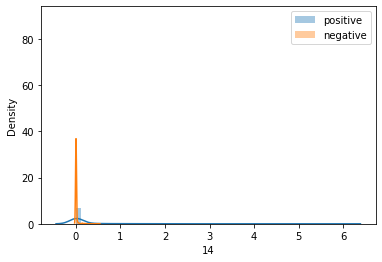

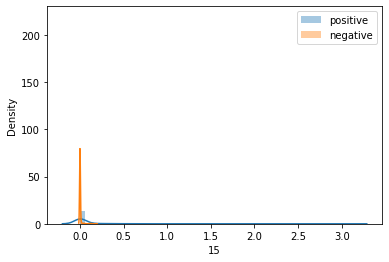

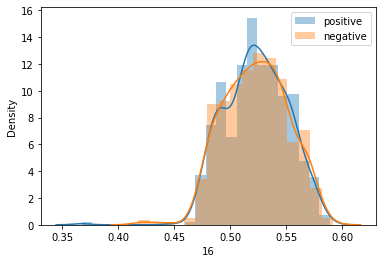

In [ ]:
for col in data[ex_columns]:
  plt.figure()
  sns.distplot(positif[col], label='positive')
  sns.distplot(negative[col], label='negative')
  plt.legend()

just like the MA-detection features, the exedute features have an asymetrique distrubution plus we notice a diffrence in value's in positive and negative cases which tell us that these attributes have a role in the classification for a postive or a negative Diabetic retina case

In [ ]:
add_columns = data.columns[0:2] | data.columns[17:19]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  """Entry point for launching an IPython kernel.


In [ ]:
add_columns

Index(['0', '1', '17', '18'], dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWar

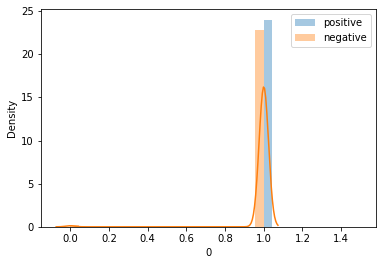

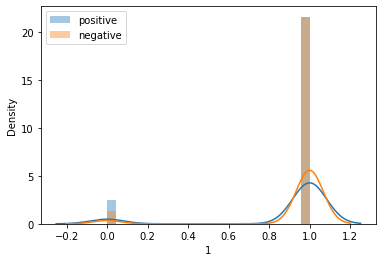

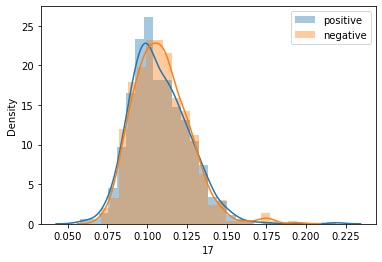

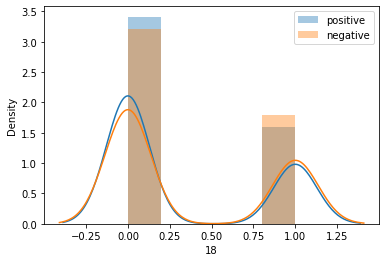

In [ ]:
for col in data[add_columns]:
  plt.figure()
  sns.distplot(positif[col], label='positive')
  sns.distplot(negative[col], label='negative')
  plt.legend()

lastly, we grouped the attributes 0,1,17,18 which represent respectevly
quality assessment,pre-screening,The euclidean distance, and the AM/FM-based classification.

with the help of the diagrammes we conclude that the feature 17 plays a role in the detection of positive and negative DR while the other features doesn't seem to affect the result

In [ ]:
data.iloc[:, 18].value_counts()

0    764
1    387
Name: 18, dtype: int64

# preprocessing

we start the preprocessing phase by changing the names of the features to simplefy readability

In [ ]:
new_name = {'0': 'quality assess',
            '1': 'pre-screening',
            '2': 'MAD:0.5',
            '3': 'MAD:0.6',
            '4': 'MAD:0.7',
            '5': 'MAD:0.8',
            '6': 'MAD:0.9',
            '7': 'MAD:1.0',
            '8': 'exD:0.2',
            '9': 'exD:0.3',
            '10': 'exD:0.4',
            '11': 'exD:0.5',
            '12': 'exD:0.6',
            '13': 'exD:0.7',
            '14': 'exD:0.8',
            '15': 'exD:0.9',
            '16': 'exD:1.0',
            '17': 'euclidean distance',
            '18': 'AM/FM',}

data.rename(columns=new_name, inplace=True)
data.head()

,quality assess,pre-screening,MAD:0.5,MAD:0.6,MAD:0.7,MAD:0.8,MAD:0.9,MAD:1.0,exD:0.2,exD:0.3,exD:0.4,exD:0.5,exD:0.6,exD:0.7,exD:0.8,exD:0.9,exD:1.0,euclidean distance,AM/FM,Class
0,1,1,22,22,22,19,18,14,49.895756,17.775994,5.270920,0.771761,0.018632,0.006864,0.003923,0.003923,0.486903,0.100025,1,0
1,1,1,24,24,22,18,16,13,57.709936,23.799994,3.325423,0.234185,0.003903,0.003903,0.003903,0.003903,0.520908,0.144414,0,0
2,1,1,62,60,59,54,47,33,55.831441,27.993933,12.687485,4.852282,1.393889,0.373252,0.041817,0.007744,0.530904,0.128548,0,1
3,1,1,55,53,53,50,43,31,40.467228,18.445954,9.118901,3.079428,0.840261,0.272434,0.007653,0.001531,0.483284,0.114790,0,0
4,1,1,44,44,44,41,39,27,18.026254,8.570709,0.410381,0.000000,0.000000,0.000000,0.000000,0.000000,0.475935,0.123572,0,1


after that we define a function rm_QA to remove the quality assessment attributs for its inimportant in the final result

In [ ]:
def rm_QA(or_data):

  data = or_data.copy()

  print(f'unique values of Quality assess : {data.iloc[:, 0].unique()}\n')
  print(data.value_counts('quality assess'))

  #we drop the values of 0
  indexs = data.loc[data['quality assess'] == 0].index
  data = data.drop(indexs, axis=0)

  #we drop the quality assess column
  data = data.reset_index(drop=True)
  data = data.drop(['quality assess'], axis=1)

  return data

In [ ]:
data2 = rm_QA(data)

unique values of Quality assess : [1 0]

quality assess
1    1147
0       4
dtype: int64


from the output of the rm_QA function we notice that only 4 values had bad assessement

In [ ]:
data2

,pre-screening,MAD:0.5,MAD:0.6,MAD:0.7,MAD:0.8,MAD:0.9,MAD:1.0,exD:0.2,exD:0.3,exD:0.4,exD:0.5,exD:0.6,exD:0.7,exD:0.8,exD:0.9,exD:1.0,euclidean distance,AM/FM,Class
0,1,22,22,22,19,18,14,49.895756,17.775994,5.270920,0.771761,0.018632,0.006864,0.003923,0.003923,0.486903,0.100025,1,0
1,1,24,24,22,18,16,13,57.709936,23.799994,3.325423,0.234185,0.003903,0.003903,0.003903,0.003903,0.520908,0.144414,0,0
2,1,62,60,59,54,47,33,55.831441,27.993933,12.687485,4.852282,1.393889,0.373252,0.041817,0.007744,0.530904,0.128548,0,1
3,1,55,53,53,50,43,31,40.467228,18.445954,9.118901,3.079428,0.840261,0.272434,0.007653,0.001531,0.483284,0.114790,0,0
4,1,44,44,44,41,39,27,18.026254,8.570709,0.410381,0.000000,0.000000,0.000000,0.000000,0.000000,0.475935,0.123572,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1142,1,34,34,34,33,31,24,6.071765,0.937472,0.031145,0.003115,0.000000,0.000000,0.000000,0.000000,0.537470,0.116795,0,0
1143,1,49,49,49,49,45,37,63.197145,27.377668,8.067688,0.979548,0.001552,0.000000,0.000000,0.000000,0.516733,0.124190,0,0
1144,0,49,48,48,45,43,33,30.461898,13.966980,1.763305,0.137858,0.011221,0.000000,0.000000,0.000000,0.560632,0.129843,0,0
1145,1,39,36,29,23,13,7,40.525739,12.604947,4.740919,1.077570,0.563518,0.326860,0.239568,0.174584,0.485972,0.106690,1,1


here we define a function called features_ing that create a copy of the dataset and start grouping all MA features and Exedute's all into 2 atributtes to test if this will do any diffrence in the output

In [ ]:
def features_ing(Data):
  data = Data.copy()
  data['MA'] = data.iloc[:, 1:7].sum(axis=1)
  data['ex'] = data.iloc[:, 7:16].sum(axis=1)
  data = data.drop(data.iloc[:, 1:7].columns, axis=1)
  data = data.drop(data.iloc[:, 1:10].columns, axis=1)

  return data

In [ ]:
data3 = features_ing(data2)

In [ ]:
data3

,pre-screening,euclidean distance,AM/FM,Class,MA,ex
0,1,0.100025,1,0,117,74.234676
1,1,0.144414,0,0,117,85.606058
2,1,0.128548,0,1,315,103.712747
3,1,0.114790,0,0,285,72.716674
4,1,0.123572,0,1,239,27.483279
...,...,...,...,...,...,...
1142,1,0.116795,0,0,190,7.580967
1143,1,0.124190,0,0,278,100.140334
1144,0,0.129843,0,0,266,46.901894
1145,1,0.106690,1,1,147,60.739677


in this part we created 4 version of the dataset for testing purposes where :



1.   the first dataset (x, y) : is the dataset where we remove the quality assessement attribut ending with 18 + the output attribut (Class)
2.   the seconde dataset (x2, y2) : is the dataset where we grouped the MA and Exedute attributes into 2 attributes ending with 5 + the output attribut (Class)
3.   the third dataset (x3, y3) : is a copy of the first dataset but we removed pre-screening and AM/FM on top of the quality assessement attribut ending with 16 + the output attribut (Class)
4.   the fourth dataset (x4, y4) : is a copy of the seconde dataset but we removed pre-screening and AM/FM leaving us with 3 + the output attribut (Class)


note: we used 80% for the train set and 20% for the test set


In [ ]:
y = data2['Class']
x = data2.drop(['Class'], axis=1)

trans = PolynomialFeatures(degree=2, include_bias=False)
x = trans.fit_transform(x)

# normalizing feature matrix
x = preprocessing.normalize(x)

x_train, x_rest, y_train, y_rest = train_test_split(x, y, test_size=0.4, random_state=0)
x_test, x_valid, y_test, y_valid = train_test_split(x_rest, y_rest, test_size=0.2, random_state=0)

In [ ]:
y2 = data3['Class']
x2 = data3.drop(['Class'], axis=1)

trans = PolynomialFeatures(degree=2, include_bias=False)
x2 = trans.fit_transform(x2)

# normalizing feature matrix
x2 = preprocessing.normalize(x2)

x_train2, x_rest2, y_train2, y_rest2 = train_test_split(x2, y2, test_size=0.4, random_state=0)
x_test2, x_valid2, y_test2, y_valid2 = train_test_split(x_rest2, y_rest2, test_size=0.2, random_state=0)

In [ ]:
y3 = data2['Class']
x3 = data2.drop(['Class', 'pre-screening', 'AM/FM'], axis=1)

trans = PolynomialFeatures(degree=2, include_bias=False)
x3 = trans.fit_transform(x3)

# normalizing feature matrix
x3 = preprocessing.normalize(x3)

x_train3, x_rest3, y_train3, y_rest3 = train_test_split(x3, y3, test_size=0.4, random_state=0)
x_test3, x_valid3, y_test3, y_valid3 = train_test_split(x_rest3, y_rest3, test_size=0.2, random_state=0)

In [ ]:
y4 = data3['Class']
x4 = data3.drop(['Class', 'pre-screening', 'AM/FM'], axis=1)

trans = PolynomialFeatures(degree=2, include_bias=False)
x4 = trans.fit_transform(x4)

# normalizing feature matrix
x4 = preprocessing.normalize(x4)

x_train4, x_rest4, y_train4, y_rest4 = train_test_split(x4, y4, test_size=0.4, random_state=0)
x_test4, x_valid4, y_test4, y_valid4 = train_test_split(x_rest4, y_rest4, test_size=0.2, random_state=0)

we created a function called function to preform the process of training and evaluting the chosen model

In [ ]:
from sklearn import metrics

def forward(model, x_train, y_train, x_test, y_test, x_valid, y_valid):

  model.fit(x_train, y_train)

  print("this is score of train: ", model.score(x_train, y_train))
  print("------------------------------------------------------------------------")
  print("accuracy of train:", metrics.accuracy_score(y_train, model.predict(x_train)))
  print("recall of train:", metrics.recall_score(y_train, model.predict(x_train)))
  print("f1 of train:", metrics.f1_score(y_train, model.predict(x_train)))
  print("________________________________________________________________________")
  print("this is score of valid: ", model.score(x_valid, y_valid))
  print("accuracy of valid:", metrics.accuracy_score(y_valid, model.predict(x_valid)))
  print("recall of valid:", metrics.recall_score(y_valid, model.predict(x_valid)))
  print("f1 of valid:", metrics.f1_score(y_valid, model.predict(x_valid)))
  print("________________________________________________________________________")
  print("this is score of test : ", model.score(x_test, y_test))
  print("accuracy of test:", metrics.accuracy_score(y_test, model.predict(x_test)))
  print("recall of test:", metrics.recall_score(y_test, model.predict(x_test)))
  print("f1 of test:", metrics.f1_score(y_test, model.predict(x_test)))
  print("________________________________________________________________________")
  
  y_pred = model.predict(x_test)
  
  cm = confusion_matrix(y_test, y_pred)
  print(cm)

  cr = classification_report(y_test, y_pred)
  print(cr)


  N, train_score, valid_score = learning_curve(model, x_train, y_train, cv=10, scoring='accuracy', train_sizes=np.linspace(0.1, 1, 10))

  plt.figure()
  plt.plot(N, train_score.mean(axis=1), label='train curve')
  plt.plot(N, valid_score.mean(axis=1), label='test curve')
  plt.legend()

  return model

we started to do an initial phase of training and evaluating predefined model to figure out which dataset is the best and to confirm that

here we used 3 model (RandomForestClassifier,SVC,KNneighborsClassifier)

In [ ]:
random = make_pipeline(PolynomialFeatures(2, include_bias=False),
                       RandomForestClassifier(random_state=0))
svc = make_pipeline(PolynomialFeatures(2, include_bias=False),
                    StandardScaler(),
                    SVC(random_state=0))
knn = make_pipeline(PolynomialFeatures(2, include_bias=False),
                    StandardScaler(),
                    KNeighborsClassifier())

In [ ]:
random2 = RandomForestClassifier(random_state=0)
svc2 = SVC(random_state=0)
knn2 = KNeighborsClassifier()

In [ ]:
modellist = [random2, svc2, knn2]

this is score of train:  1.0
------------------------------------------------------------------------
accuracy of train: 1.0
recall of train: 1.0
f1 of train: 1.0
________________________________________________________________________
this is score of valid:  0.7391304347826086
accuracy of valid: 0.7391304347826086
recall of valid: 0.723404255319149
f1 of valid: 0.7391304347826088
________________________________________________________________________
this is score of test :  0.6893732970027248
accuracy of test: 0.6893732970027248
recall of test: 0.6868686868686869
f1 of test: 0.7046632124352332
________________________________________________________________________
[[117  52]
 [ 62 136]]
              precision    recall  f1-score   support

           0       0.65      0.69      0.67       169
           1       0.72      0.69      0.70       198

    accuracy                           0.69       367
   macro avg       0.69      0.69      0.69       367
weighted avg       0.69    

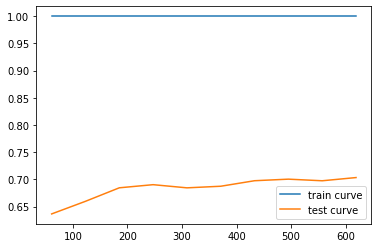

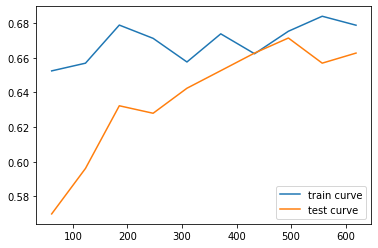

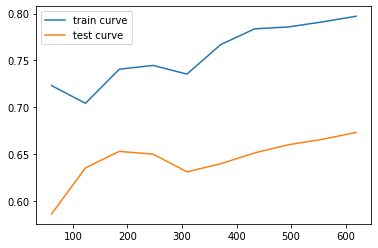

In [ ]:
for mod in modellist:
  model = forward(mod, x_train, y_train, x_test, y_test, x_valid, y_valid)
  # without SelectKBEst

this is score of train:  1.0
------------------------------------------------------------------------
accuracy of train: 1.0
recall of train: 1.0
f1 of train: 1.0
________________________________________________________________________
this is score of valid:  0.6304347826086957
accuracy of valid: 0.6304347826086957
recall of valid: 0.6808510638297872
f1 of valid: 0.6530612244897959
________________________________________________________________________
this is score of test :  0.5912806539509536
accuracy of test: 0.5912806539509536
recall of test: 0.6313131313131313
f1 of test: 0.625
________________________________________________________________________
[[ 92  77]
 [ 73 125]]
              precision    recall  f1-score   support

           0       0.56      0.54      0.55       169
           1       0.62      0.63      0.62       198

    accuracy                           0.59       367
   macro avg       0.59      0.59      0.59       367
weighted avg       0.59      0.59      

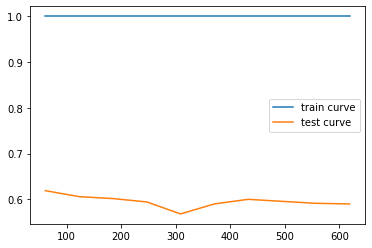

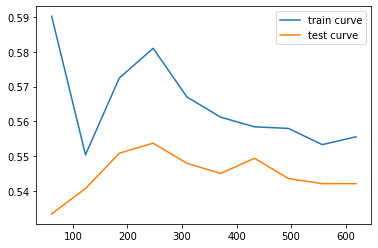

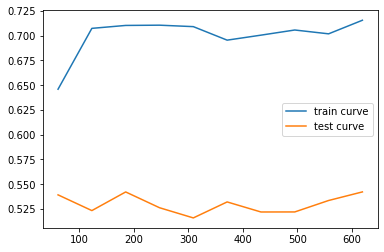

In [ ]:
for mod in modellist:
  model = forward(mod, x_train2, y_train2, x_test2, y_test2, x_valid2, y_valid2)
  # without SelectKBEst

this is score of train:  1.0
------------------------------------------------------------------------
accuracy of train: 1.0
recall of train: 1.0
f1 of train: 1.0
________________________________________________________________________
this is score of valid:  0.75
accuracy of valid: 0.75
recall of valid: 0.7021276595744681
f1 of valid: 0.7415730337078651
________________________________________________________________________
this is score of test :  0.6839237057220708
accuracy of test: 0.6839237057220708
recall of test: 0.6666666666666666
f1 of test: 0.6947368421052631
________________________________________________________________________
[[119  50]
 [ 66 132]]
              precision    recall  f1-score   support

           0       0.64      0.70      0.67       169
           1       0.73      0.67      0.69       198

    accuracy                           0.68       367
   macro avg       0.68      0.69      0.68       367
weighted avg       0.69      0.68      0.68       367


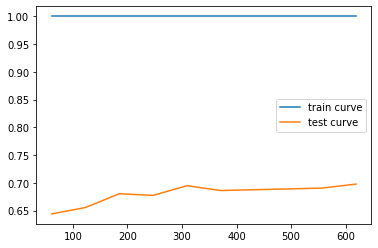

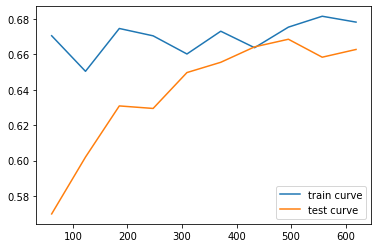

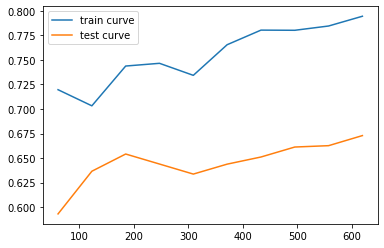

In [ ]:
for mod in modellist:
  model = forward(mod, x_train3, y_train3, x_test3, y_test3, x_valid3, y_valid3)
  # without SelectKBEst

this is score of train:  1.0
------------------------------------------------------------------------
accuracy of train: 1.0
recall of train: 1.0
f1 of train: 1.0
________________________________________________________________________
this is score of valid:  0.5869565217391305
accuracy of valid: 0.5869565217391305
recall of valid: 0.6595744680851063
f1 of valid: 0.62
________________________________________________________________________
this is score of test :  0.6212534059945504
accuracy of test: 0.6212534059945504
recall of test: 0.6515151515151515
f1 of test: 0.6498740554156172
________________________________________________________________________
[[ 99  70]
 [ 69 129]]
              precision    recall  f1-score   support

           0       0.59      0.59      0.59       169
           1       0.65      0.65      0.65       198

    accuracy                           0.62       367
   macro avg       0.62      0.62      0.62       367
weighted avg       0.62      0.62      0

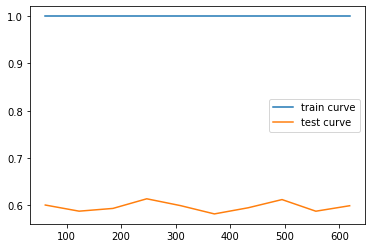

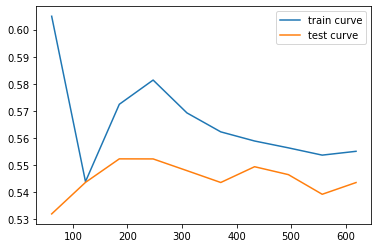

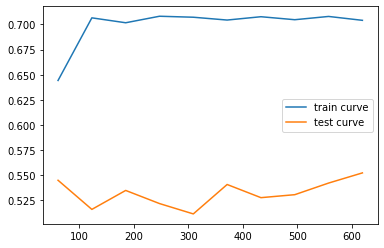

In [ ]:
for mod in modellist:
  model = forward(mod, x_train4, y_train4, x_test4, y_test4, x_valid4, y_valid4)
  # without SelectKBEst

In [ ]:
model = RandomForestClassifier(random_state=0)
model.fit(x_train, y_train)
model.score(x_test,y_test)

0.6623376623376623

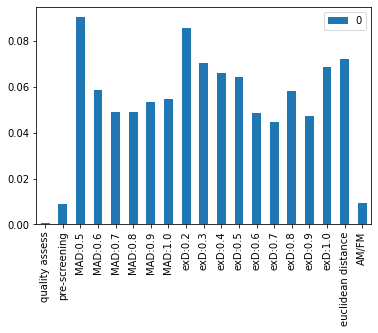

In [ ]:
pd.DataFrame(model.feature_importances_, index=x_train.columns).plot.bar()

at the end of this first evaluation phase we conclude that the third dataset is the best one that achieve the best result where we used the recall for scoring

and at the end we confirmed that the pre-screening and AM/FM features are important as the rest of them so it was a good choice to drop them

# this is a trying area logistic regression is down

In [ ]:
def gridding(model, param):

  grid = RandomizedSearchCV(model, param, scoring='f1', cv=5, n_iter=40)
  grid.fit(x_train3, y_train3)
  print(grid.best_score_)
  print(grid.best_params_)

  y_pred = grid.predict(x_test3)
  print(classification_report(y_test3, y_pred))

  return grid.best_estimator_

In [ ]:
param = { 'svc__gamma': [1e-3, 1e-4, 'scale'],
          'svc__C': [1, 10, 100, 1000],
          'pipeline__polynomialfeatures__degree': [2, 3, 4],
          'pipeline__selectkbest__k': range(50, 60),
          'svc__kernel': ['linear', 'rbf'],
          'svc__decision_function_shape': ['ovo', 'ovr']}

mm = gridding(svc2, param)

0.7544961317664303
{'svc__kernel': 'rbf', 'svc__gamma': 0.001, 'svc__decision_function_shape': 'ovr', 'svc__C': 1000, 'pipeline__selectkbest__k': 51, 'pipeline__polynomialfeatures__degree': 2}
              precision    recall  f1-score   support

           0       0.68      0.88      0.77       108
           1       0.86      0.64      0.73       122

    accuracy                           0.75       230
   macro avg       0.77      0.76      0.75       230
weighted avg       0.78      0.75      0.75       230



In [ ]:
def normalize(X):
    '''
    function to normalize feature matrix, X
    '''
    mins = np.min(X, axis = 0)
    maxs = np.max(X, axis = 0)
    rng = maxs - mins
    norm_X = 1 - ((maxs - X)/rng)
    return norm_X
 
 
def logistic_func(beta, X):
    '''
    logistic(sigmoid) function
    '''
    return 1.0/(1 + np.exp(-np.dot(X, beta.T)))
 
 
def log_gradient(beta, X, y):
    '''
    logistic gradient function
    '''
    first_calc = logistic_func(beta, X) - y.reshape(X.shape[0], -1)
    final_calc = np.dot(first_calc.T, X)
    return np.sum(final_calc)/len(y)
 
 
def cost_func(beta, X, y):
    '''
    cost function, J
    '''
    log_func_v = logistic_func(beta, X)
    y = np.squeeze(y)
    step1 = y * np.log(log_func_v)
    step2 = (1 - y) * np.log(1 - log_func_v)
    final = -step1 - step2
    return np.sum(final)/len(y)
 
 
def grad_desc(X, y, beta, lr=.01, iterations=10000):
    '''
    gradient descent function
    '''
    cost = cost_func(beta, X, y) ; history = [] ; print(f"this is the first cost : {cost}")
    #change_cost = 1
    num_iter = 1
     
    while(num_iter < iterations):
        old_cost = cost
        beta = beta - (lr * log_gradient(beta, X, y))
        cost = cost_func(beta, X, y) ; history.append(cost)
        #change_cost = old_cost - cost
        num_iter += 1
     
    return beta, history

def pred_values(beta, X):
	'''
	function to predict labels
	'''
	pred_prob = logistic_func(beta, X)
	pred_value = np.where(pred_prob >= .5, 1, 0)
	return np.squeeze(pred_value)


def plot_reg(X, y, beta):
	'''
	function to plot decision boundary
	'''
	# labelled observations
	x_0 = X[np.where(y == 0.0)]
	x_1 = X[np.where(y == 1.0)]
	
	# plotting points with diff color for diff label
	plt.scatter([x_0[:, 1]], [x_0[:, 2]], c='b', label='y = 0')
	plt.scatter([x_1[:, 1]], [x_1[:, 2]], c='r', label='y = 1')
	
	# plotting decision boundary
	x1 = np.arange(0, 1, 0.1)
	x2 = -(beta[0,0] + beta[0,1]*x1)/beta[0,2]
	plt.plot(x1, x2, c='k', label='reg line')

	plt.xlabel('x1')
	plt.ylabel('x2')
	plt.legend()
	plt.show()

X shape before the hstack : (1147, 16)
X shape after the hstack : (1147, 17)
y shape : (1147, 1)
beta shape : (1, 17)
this is the first cost : 0.6931471805599447


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: divide by zero encountered in log


Estimated regression coefficients: [[ -0.47167532 123.03539777  29.49301454 -33.17741885 -59.20302497
  -31.83721794  16.05654378   9.49894249  -8.15368526   1.42540629
  -18.7101138    9.41357828   0.31589964  25.37478549  22.76557889
    0.63197077  -2.64212576]]
Correctly predicted labels: 690842
equal: (1147, 1) == (1147,)


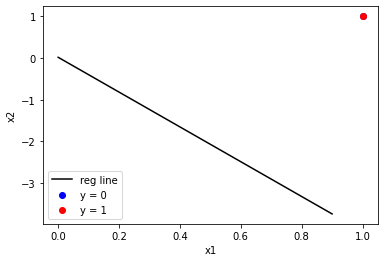

In [ ]:
# normalizing feature matrix
X = normalize(x3)
print(f"X shape before the hstack : {X.shape}")

     
# stacking columns with all ones in feature matrix
X = np.hstack((np.matrix(np.ones(X.shape[0])).T, X))
print(f"X shape after the hstack : {X.shape}")


# response vector
#y = dataset[:, -1]
y3 = np.array(y3.values)
y3 = y3.reshape(y3.shape[0],1)
print(f"y shape : {y3.shape}")

''' x_train3, x_test3, y_train3, y_test3 = train_test_split(X, y3, test_size=0.2, random_state=0)

y_train3 = np.array(y_train3)
y_train3 = y_train3.reshape(y_train3.shape[0],1)
y_test3 = np.array(y_test3)
y_test3 = y_test3.reshape(y_test3.shape[0],1)

print(f"x_train3 shape after the hstack : {x_train3.shape}")
print(f"y_train3 shape after the hstack : {y_train3.shape}") '''
 
# initial beta values
beta = np.matrix(np.zeros(X.shape[1]))
print(f"beta shape : {beta.shape}")

# beta values after running gradient descent
beta, history = grad_desc(X, y3, beta)
 
# estimated beta values and number of iterations
print("Estimated regression coefficients:", beta)
#print("No. of iterations:", num_iter)
 
# predicted labels
y_pred = pred_values(beta, X)
     
# number of correctly predicted labels
print("Correctly predicted labels:", np.sum(y3 == y_pred))
print(f"equal: {y3.shape} == {y_pred.shape}")
     
# plotting regression line
plot_reg(X, y3, beta)

# **Logistic regression**

In [ ]:
def normalize(X):
    '''
    function to normalize feature matrix, X
    '''
    mins = np.min(X, axis = 0)
    maxs = np.max(X, axis = 0)
    rng = maxs - mins
    norm_X = 1 - ((maxs - X)/rng)
    return norm_X
 
 
def logistic_func(beta, X):
    '''
    logistic(sigmoid) function
    '''
    return 1.0/(1 + np.exp(-1 * np.dot(X, beta.T)))
 
 
def log_gradient(beta, X, y):
    '''
    logistic gradient function
    '''
    m = len(y)
    first_calc = logistic_func(beta, X) - y.reshape(X.shape[0], -1)
    final_calc = np.dot(first_calc.T, X)
    return 1/m * final_calc
 
 
def cost_func(beta, X, y):
    '''
    cost function, J
    '''
    m = len(y)
    log_func_v = logistic_func(beta, X)
    y = np.squeeze(y)
    step1 = y * np.log(log_func_v)
    step2 = (1 - y) * np.log(1 - log_func_v)
    final = -step1 - step2
    return (1/m) * np.sum(final)
 
 
def grad_desc(X, y, beta, lr=.9, iterations=50000):
    '''
    gradient descent function
    '''
    cost = cost_func(beta, X, y) ; history = [] ; print(f"this is the first cost : {cost}")
    #change_cost = 1
    num_iter = 1
     
    for i in range(0, iterations):
        beta = beta - (lr * log_gradient(beta, X, y))
        cost = cost_func(beta, X, y) ; history.append(cost)
        #change_cost = old_cost - cost
      
     
    return beta, history

def pred_values(beta, X):
	'''
	function to predict labels
	'''
	pred_prob = logistic_func(beta, X)
	pred_value = np.where(pred_prob >= .5, 1, 0)
	return np.squeeze(pred_value)


def plot_reg(X, y, beta):
	'''
	function to plot decision boundary
	'''
	# labelled observations
	x_0 = X[np.where(y == 0.0)]
	x_1 = X[np.where(y == 1.0)]
	
	# plotting points with diff color for diff label
	plt.scatter([x_0[:, 1]], [x_0[:, 7]], c='b', label='y = 0')
	plt.scatter([x_1[:, 1]], [x_1[:, 7]], c='r', label='y = 1')
	
	# plotting decision boundary
	x1 = np.arange(0, 1, 0.1)
	x2 = -(beta[0,0] + beta[0,1]*x1)/beta[0,7]
	plt.plot(x1, x2, c='k', label='reg line')

	plt.xlabel('x1')
	plt.ylabel('x2')
	plt.legend()
	plt.show()

In [ ]:
y3 = data2['Class']
x3 = data2.drop(['Class', 'pre-screening', 'AM/FM'], axis=1)

In [ ]:
y4 = data3['Class']
x4 = data3.drop(['Class', 'pre-screening', 'AM/FM'], axis=1)

#y3 = data2['Class']
#x3 = data2.drop(['Class', 'pre-screening', 'AM/FM'], axis=1)

#y2 = data3['Class']
#x2 = data3.drop(['Class'], axis=1)

#y = data2['Class']
#x = data2.drop(['Class'], axis=1)

In [ ]:
y4 = data3['Class']
x4 = data3.drop(['Class', 'pre-screening', 'AM/FM'], axis=1)
''' 
trans = PolynomialFeatures(degree=2, include_bias=False)
x4 = trans.fit_transform(x4)

# normalizing feature matrix
x4 = preprocessing.normalize(x4)

x_train4, x_rest4, y_train4, y_rest4 = train_test_split(x4, y4, test_size=0.4, random_state=0)
x_test4, x_valid4, y_test4, y_valid4 = train_test_split(x_rest4, y_rest4, test_size=0.2, random_state=0)
   ''''''
y3 = data2['Class']
x3 = data2.drop(['Class', 'pre-screening', 'AM/FM'], axis=1) '''
''' 
trans = PolynomialFeatures(degree=2, include_bias=False)
x3 = trans.fit_transform(x3)

# normalizing feature matrix
x3 = preprocessing.normalize(x3)

x_train3, x_rest3, y_train3, y_rest3 = train_test_split(x3, y3, test_size=0.4, random_state=0)
x_test3, x_valid3, y_test3, y_valid3 = train_test_split(x_rest3, y_rest3, test_size=0.2, random_state=0)
 '''
''' y2 = data3['Class']
x2 = data3.drop(['Class'], axis=1)
 '''
''' trans = PolynomialFeatures(degree=2, include_bias=False)
x2 = trans.fit_transform(x2)

# normalizing feature matrix
x2 = preprocessing.normalize(x2)

x_train2, x_rest2, y_train2, y_rest2 = train_test_split(x2, y2, test_size=0.4, random_state=0)
x_test2, x_valid2, y_test2, y_valid2 = train_test_split(x_rest2, y_rest2, test_size=0.2, random_state=0)
 '''
''' y = data2['Class']
x = data2.drop(['Class'], axis=1) '''

" y = data2['Class']\nx = data2.drop(['Class'], axis=1) "

In [ ]:
from sklearn import preprocessing

X shape before the hstack : (1147, 9)
X shape after the hstack : (1147, 10)
y shape : (1147,)
x_train3 shape after the hstack : (688, 10)
y_train3 shape after the hstack : (688,)
beta shape : (1, 10)
this is the first cost : 0.6931471805599454
Estimated regression coefficients: [[-8.06530409e+00 -3.27750213e-02 -7.35812411e+00 -8.28586445e+00
  -4.47408630e-03 -8.91293830e-01 -8.74160953e-01  8.61314940e+00
  -2.36830682e+00  8.23171378e+00]]
------------------------------------------------------------------------
accuracy of train: 0.5552325581395349
recall of train: 0.7814207650273224
f1 of train: 0.6514806378132119
________________________________________________________________________
accuracy of valid: 0.5652173913043478
recall of valid: 0.9361702127659575
f1 of valid: 0.6875
________________________________________________________________________
accuracy of test: 0.5613079019073569
recall of test: 0.8232323232323232
f1 of test: 0.6694045174537988
_______________________________

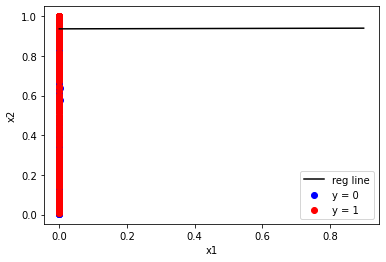

In [ ]:
trans = PolynomialFeatures(degree=2, include_bias=False)
x4 = trans.fit_transform(x4)

# normalizing feature matrix
X = preprocessing.normalize(x4)
#X = StandardScaler().fit_transform(x3)
#X = x3
print(f"X shape before the hstack : {X.shape}")

     
# stacking columns with all ones in feature matrix
X = np.hstack((np.matrix(np.ones(X.shape[0])).T, X))
print(f"X shape after the hstack : {X.shape}")


#X = StandardScaler().fit_transform(x)

# response vector
#y = dataset[:, -1]
y4 = np.array(y4.values)
#y3 = y3.reshape(y3.shape[0],1)
print(f"y shape : {y4.shape}")

x_train3, x_rest3, y_train3, y_rest3 = train_test_split(X, y4, test_size=0.4, random_state=0) 
x_test3, x_valid3, y_test3, y_valid3  = train_test_split(x_rest3, y_rest3, test_size=0.2, random_state=0)

y_train3 = np.array(y_train3)
#y_train3 = y_train3.reshape(y_train3.shape[0],1)
y_test3 = np.array(y_test3)
#y_test3 = y_test3.reshape(y_test3.shape[0],1)

print(f"x_train3 shape after the hstack : {x_train3.shape}")
print(f"y_train3 shape after the hstack : {y_train3.shape}")
 
# initial beta values
beta = np.matrix(np.zeros(x_train3.shape[1]))
print(f"beta shape : {beta.shape}")

# beta values after running gradient descent
beta, history = grad_desc(x_train3, y_train3, beta)
 
# estimated beta values and number of iterations
print("Estimated regression coefficients:", beta)
#print("No. of iterations:", num_iter)
 
#X2 = np.hstack((np.matrix(np.ones(x_test3.shapebeta, [0])).T))
#print(f"X shape after the hstack : {X2.shape}")
# predicted labels
y_pred = pred_values(beta, x_test3)


print("------------------------------------------------------------------------")
print("accuracy of train:", metrics.accuracy_score(y_train3, pred_values(beta, x_train3)))
print("recall of train:", metrics.recall_score(y_train3, pred_values(beta, x_train3)))
print("f1 of train:", metrics.f1_score(y_train3, pred_values(beta, x_train3)))
print("________________________________________________________________________")
  
print("accuracy of valid:", metrics.accuracy_score(y_valid3, pred_values(beta, x_valid3)))
print("recall of valid:", metrics.recall_score(y_valid3, pred_values(beta, x_valid3)))
print("f1 of valid:", metrics.f1_score(y_valid3, pred_values(beta, x_valid3)))
print("________________________________________________________________________")
  
print("accuracy of test:", metrics.accuracy_score(y_test3, pred_values(beta, x_test3)))
print("recall of test:", metrics.recall_score(y_test3, pred_values(beta, x_test3)))
print("f1 of test:", metrics.f1_score(y_test3, pred_values(beta, x_test3)))
print("________________________________________________________________________")
  
     
# number of correctly predicted labels
print("Correctly predicted labels:", np.sum(y_test3 == y_pred))
print(f"equal: {y_test3.shape} == {y_pred.shape}")
     
# plotting regression line
plot_reg(x_train3, y_train3, beta)

In [ ]:
a = np.isnan(history)
k=0
for i in range(len(a)):
  if(a[i] == True):
    k += 1

print(f"this code to see if ther is a nan value : {k}")

this code to see if ther is a nan value : 0


In [ ]:
# this is the score of third dataset 
print(f"the recall score is : {recall_score(y_test3, y_pred)}")
print(f"the f1 score is : {f1_score(y_test3, y_pred)}")
print(f"the accuracy score is : {accuracy_score(y_test3, y_pred)}")

the recall score is : 0.7377049180327869
the f1 score is : 0.7500000000000001
the accuracy score is : 0.7391304347826086


In [ ]:
# this is the score of forth dataset 
print(f"the recall score is : {recall_score(y_test3, y_pred)}")
print(f"the f1 score is : {f1_score(y_test3, y_pred)}")
print(f"the accuracy score is : {accuracy_score(y_test3, y_pred)}")

the recall score is : 0.819672131147541
the f1 score is : 0.6644518272425248
the accuracy score is : 0.5608695652173913


In [ ]:
# this is the score of first dataset 
print(f"the recall score is : {recall_score(y_test3, y_pred)}")
print(f"the f1 score is : {f1_score(y_test3, y_pred)}")
print(f"the accuracy score is : {accuracy_score(y_test3, y_pred)}")

the recall score is : 0.7540983606557377
the f1 score is : 0.7603305785123967
the accuracy score is : 0.7478260869565218


In [ ]:
# this is the score of seconde dataset 
print(f"the recall score is : {recall_score(y_test3, y_pred)}")
print(f"the f1 score is : {f1_score(y_test3, y_pred)}")
print(f"the accuracy score is : {accuracy_score(y_test3, y_pred)}")

the recall score is : 0.8360655737704918
the f1 score is : 0.6777408637873754
the accuracy score is : 0.5782608695652174


In [ ]:
# this is the score of first dataset without AM/FM
print(f"the recall score is : {recall_score(y_test3, y_pred)}")
print(f"the f1 score is : {f1_score(y_test3, y_pred)}")
print(f"the accuracy score is : {accuracy_score(y_test3, y_pred)}")

the recall score is : 0.7459016393442623
the f1 score is : 0.7583333333333333
the accuracy score is : 0.7478260869565218


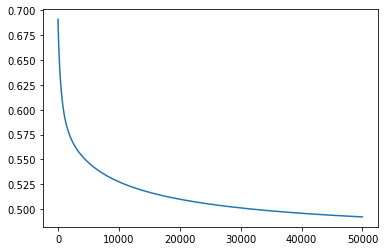

In [ ]:
plt.plot(range(50000), history)

In [ ]:
'0': 'quality assess',
            '1': 'pre-screening',
            '2': 'MAD:0.5',
            '3': 'MAD:0.6',
            '4': 'MAD:0.7',
            '5': 'MAD:0.8',
            '6': 'MAD:0.9',
            '7': 'MAD:1.0',
            '8': 'exD:0.2',
            '9': 'exD:0.3',
            '10': 'exD:0.4',
            '11': 'exD:0.5',
            '12': 'exD:0.6',
            '13': 'exD:0.7',
            '14': 'exD:0.8',
            '15': 'exD:0.9',
            '16': 'exD:1.0',
            '17': 'euclidean distance',
            '18': 'AM/FM'

In [ ]:

plt.figure(figsize=(12, 8))

sns.boxplot(data=data2,y="Class",orient="v",ax=axes[0][0])
sns.boxplot(data=data2,y="Class",x="euclidean distance",orient="v",ax=axes[0][1])
sns.boxplot(data=data2,y="Class",x="AM/FM",orient="v",ax=axes[1][0])
sns.boxplot(data=data2,y="Class",x="MAD:0.5",orient="v",ax=axes[1][1])
sns.boxplot(data=data2,y="Class",x="exD:0.2",orient="v",ax=axes[2][0])


axes[0][0].set(ylabel='Count',title="Box Plot On Count")
axes[0][1].set(xlabel='euclidean distance', ylabel='Count',title="Box Plot euclidean distance")
axes[1][0].set(xlabel='AM/FM', ylabel='Count',title="Box Plot AM/FM")
axes[1][1].set(xlabel='MAD:0.5', ylabel='Count',title="Box Plot MAD:0.5")
axes[2][0].set(xlabel='exD:0.2', ylabel='Count',title="Box Plot exD:0.2")

[Text(17.200000000000017, 0.5, 'Count'),
 Text(0.5, 17.200000000000003, 'exD:0.2'),
 Text(0.5, 1.0, 'Box Plot exD:0.2')]

<Figure size 864x576 with 0 Axes>

In [ ]:
plt.figure(figsize=(12,8))

sns.boxplot(data=data2,y="Class",orient="v",ax=axes[0][0])
axes[0][0].set(ylabel='Count',title="Box Plot On Count")
sns.boxplot(data=data2,y="Class",x="euclidean distance",orient="v",ax=axes[0][1])
'''sns.boxplot(data=data2,y="Class",x="AM/FM",orient="v",ax=axes[1][0])
sns.boxplot(data=data2,y="Class",x="MAD:0.5",orient="v",ax=axes[1][1])
sns.boxplot(data=data2,y="Class",x="exD:0.2",orient="v",ax=axes[2][0])



axes[0][1].set(xlabel='euclidean distance', ylabel='Count',title="Box Plot euclidean distance")
axes[1][0].set(xlabel='AM/FM', ylabel='Count',title="Box Plot AM/FM")
axes[1][1].set(xlabel='MAD:0.5', ylabel='Count',title="Box Plot MAD:0.5")
axes[2][0].set(xlabel='exD:0.2', ylabel='Count',title="Box Plot exD:0.2") '''
plt.show()

<Figure size 864x576 with 0 Axes>

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
y3 = data2['Class']
x3 = data2.drop(['Class', 'pre-screening', 'AM/FM'], axis=1)

In [ ]:
trans = PolynomialFeatures(degree=2, include_bias=False)
X3 = trans.fit_transform(x3)

X = preprocessing.normalize(X3)
# normalizing feature matrix

In [ ]:
x_train3, x_test3, y_train3, y_test3 = train_test_split(X, y3, test_size=0.2, random_state=0)

In [ ]:
model = GradientBoostingClassifier(n_estimators=100,max_depth=5)

# fit the model with the training data
model.fit(x_train3,y_train3)

# predict the target on the train dataset
predict_train = model.predict(x_train3)

# Accuray Score on train dataset
accuracy_train = accuracy_score(y_train3,predict_train)
print('\naccuracy_score on train dataset : ', accuracy_train)

# predict the target on the test dataset
predict_test = model.predict(x_test3)

# Accuracy Score on test dataset
accuracy_test = accuracy_score(y_test3,predict_test)
print('\naccuracy_score on test dataset : ', accuracy_test)


accuracy_score on train dataset :  1.0

accuracy_score on test dataset :  0.7478260869565218


In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
from sklearn.ensemble import BaggingClassifier
from numpy import mean
from numpy import std
# define the model
model = BaggingClassifier(base_estimator=LogisticRegression(),
                          n_estimators=100)
# evaluate the model
n_scores = cross_val_score(model, x3, y3, scoring='accuracy', cv=10)#, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

Accuracy: 0.742 (0.043)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
